# SETUP

In [1]:
import pandas as pd
import numpy as np
import nltk
import time
import spacy
import pickle
sp = spacy.load('en_core_web_md')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

# Load data


In [2]:
# wdir="steam/"
# wdir="metacritic/"
wdir="AM_videogames/"
df = pd.read_pickle(wdir+"1_df.pkl")
print(df.shape)
print(df.groupby('game_title').review_id.nunique())
df = df.sample(frac=1).reset_index(drop=True) # random sampling and resetting index

df.head(50)

(2585, 4)
game_title
God of War III                    601
Mario Kart                        472
StarCraft II: Wings of Liberty    370
The Last of Us                    549
diablo III                        593
Name: review_id, dtype: int64


,review_id,game_title,review_text,score
0,63539,Mario Kart,Excellent product. Thank you very much.,5.0
1,51901,God of War III,This was so fun I would play again and again. ...,5.0
2,63834,Mario Kart,This is a great game as expected. I would only...,5.0
3,215692,The Last of Us,"amazing game , a masterpiece",5.0
4,72639,diablo III,this game is amazing. I wanted to play the gam...,5.0
5,65022,God of War III,Excelent,5.0
6,63563,Mario Kart,greta,5.0
7,64966,God of War III,disc was terrible wouldn't load and once it di...,1.0
8,51811,God of War III,I bought this game when it came out but haven'...,5.0
9,72669,diablo III,"Pretty good game overall, though extremely red...",3.0


# Preprocessing reviews

## split reviews in sentences + compute sentence polarities

In [3]:
from nltk import tokenize # del
from sentiment_polarity import * 
# nltk.download('punkt') # doesnt re download is exists ) 
from stopwords import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Quentin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# %%timeit -n 1 -r 1 
sentences_df = extract_sentences(df)


sentences_df['vader_polarity'] = sentences_df["sentence"].apply(getVaderPolarity)


print(sentences_df.shape)
sentences_df.to_pickle(wdir+"2_df.pkl")

sentences_df.head(20)

2585
100% processed     
(15252, 4)


,review_id,game_title,sentence,vader_polarity
0,50501,Mario Kart,If you enjoy playing slot machines you'll like...,0.8360
1,50501,Mario Kart,If you play with friends it's fun... but still...,-0.1383
2,50501,Mario Kart,You might as well flip a coin and congratulate...,0.8442
3,50501,Mario Kart,"As for the Wii Wheel, it's total crap!",-0.4914
4,50501,Mario Kart,Save your money.,0.4939
5,50501,Mario Kart,"The game looks nice, but it's ultimately disap...",-0.5267
6,59524,diablo III,Done in a few hard core nights.,-0.1027
7,59524,diablo III,1) single player is short in terms of gameplay.,0.0000
8,59524,diablo III,I seem to remember D2 taking forever to get th...,0.0000
9,59524,diablo III,One week on D3 and I am done; and I stop to ch...,-0.2960


## Stop words


In [5]:
# %%timeit -n 1 -r 1 # number of loop
sentences_df = pd.read_pickle(wdir+"2_df.pkl")

games_list=df['game_title'].unique()

proc_sent_df = remove_stop_prefixes(sentences_df,games_list)
print(proc_sent_df.shape)


proc_sent_df.to_pickle(wdir+"3_df.pkl")
proc_sent_df.head()
games_list

100% processed      % processed    % processed    % processed    % processed    % processed    % processed    % processed    % processed    % processed    % processed    % processed    % processed
(15252, 5)


array(['Mario Kart', 'diablo III', 'God of War III', 'The Last of Us',
       'StarCraft II: Wings of Liberty'], dtype=object)

## POS + Lemmatization
TB and WN, 30 sec for 20k sentences
SP is way longer, 60x longer (30 min )




In [6]:
from POSLemma import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Quentin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Quentin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Quentin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
# %%timeit -n 1 -r 1 # number of loop
POSLemmaChoice ="SP" # WN TB SP
proc_sent_df = pd.read_pickle(wdir+"3_df.pkl")


POSLemma_sent_df = POSLemma_extractor(proc_sent_df,POSLemmaChoice)


## Save POSLemma Dataframe
POSLemma_sent_df.to_pickle(wdir+"4_"+POSLemmaChoice+"_df.pkl")
print(POSLemma_sent_df.head(5))
print(POSLemma_sent_df.shape)

100% processed     
   review_id  game_title                                           sentence  \
0      50501  Mario Kart  If you enjoy playing slot machines you'll like...   
1      50501  Mario Kart  If you play with friends it's fun... but still...   
2      50501  Mario Kart  You might as well flip a coin and congratulate...   
3      50501  Mario Kart             As for the Wii Wheel, it's total crap!   
4      50501  Mario Kart                                   Save your money.   

   vader_polarity             processed_sentence  \
0          0.8360      enjoy slot machine random   
1         -0.1383               friend fun great   
2          0.8442  flip coin congratulate winner   
3         -0.4914           wii wheel total crap   
4          0.4939                     save money   

                                                tags  
0  [(enjoy, v), (slot, n), (machines, n), (random...  
1               [(friends, n), (fun, a), (great, r)]  
2  [(flip, a), (coin, n), (

# Create FOPs and compute importance

## FOPs extraction

In [4]:
from FOPs import * 

In [9]:
FOPs_df = pd.read_pickle(wdir+"4_"+POSLemmaChoice+"_df.pkl")
FOPs_df.head()

,review_id,game_title,sentence,vader_polarity,processed_sentence,tags
0,50501,Mario Kart,If you enjoy playing slot machines you'll like...,0.8360,enjoy slot machine random,"[(enjoy, v), (slot, n), (machines, n), (random..."
1,50501,Mario Kart,If you play with friends it's fun... but still...,-0.1383,friend fun great,"[(friends, n), (fun, a), (great, r)]"
2,50501,Mario Kart,You might as well flip a coin and congratulate...,0.8442,flip coin congratulate winner,"[(flip, a), (coin, n), (congratulate, n), (win..."
3,50501,Mario Kart,"As for the Wii Wheel, it's total crap!",-0.4914,wii wheel total crap,"[(wii, None), (wheel, n), (total, n), (crap, n)]"
4,50501,Mario Kart,Save your money.,0.4939,save money,"[(save, v), (money, n)]"


In [5]:
# %%timeit -n 1 -r 1 # number of loop
"""
input: Dataframe of sentences with POS tags, chosen POS method and game title. 
Output: a dictionary of FOPs with their occurence and importance(occurence*sentence polarity) , structured as: 
        {"feature1": 
            {"opinion1": 
                { "count": value, 
                "importance":value } }
            {"opinion2": 
                { "count": value, 
                "importance":value } }
"""

POSLemmaChoice="SP"
FOPs_df = pd.read_pickle(wdir+"4_"+POSLemmaChoice+"_df.pkl")
# print(FOPs_df.groupby('game_title').review_id.nunique())
games_list=df['game_title'].unique()


print(games_list)
chosen_game="diablo III"


FOPs_game_dic = extract_all_FOPs(FOPs_df, chosen_game)

save_FOPs_dic_csv(FOPs_game_dic, wdir,chosen_game )


['Mario Kart' 'God of War III' 'The Last of Us' 'diablo III'
 'StarCraft II: Wings of Liberty']
4864  sentences for the game  diablo III


In [11]:
# FOPs_game_dic

## count and importance FOPs results
Can also select only negatives or only positive, select specific feature(s)

In [12]:
FOPs_df = pd.read_csv(wdir+chosen_game+"_FOPs.csv")  # Creation of the dataframe 

FOPs_df["count"]=FOPs_df["count"]/2
FOPs_df["importance"]=FOPs_df["importance"]/2
FOPs_df["polarity"] = FOPs_df["importance"]/FOPs_df["count"]
FOPs_df["importance"] = FOPs_df["importance"]/FOPs_df["importance"].max()
FOPs_df["importance"]= abs(FOPs_df["importance"])
FOPs_df["FOP"]= (FOPs_df["feature"]) + " " + (FOPs_df["opinion"])

FOPs_df=FOPs_df.reset_index(drop=True)
# maxCount = FOPs_df.iloc[0]["count"]
# FOPs_df = FOPs_df.loc[FOPs_df["count"] > maxCount/20]
# FOPs_df = FOPs_df.sort_values('importance', ascending=False)
print(FOPs_df.shape)

(22863, 6)


,feature,opinion,count,importance,polarity,FOP
0,items,lettered,22.0,1.000000,0.576055,items lettered
1,fun,farm,9.0,0.677493,-0.954000,fun farm
2,items,better,11.0,0.640998,0.738500,items better
3,slash,bang,9.0,0.460610,-0.648600,slash bang
4,auction,good,10.0,0.456262,0.578230,auction good
5,time,good,8.0,0.456199,0.722688,time good
6,fun,act,6.0,0.451662,-0.954000,fun act
7,growth,farm,6.0,0.451662,-0.954000,growth farm
8,fun,shotted,6.0,0.451662,-0.954000,fun shotted
9,inferno,farm,6.0,0.451662,-0.954000,inferno farm


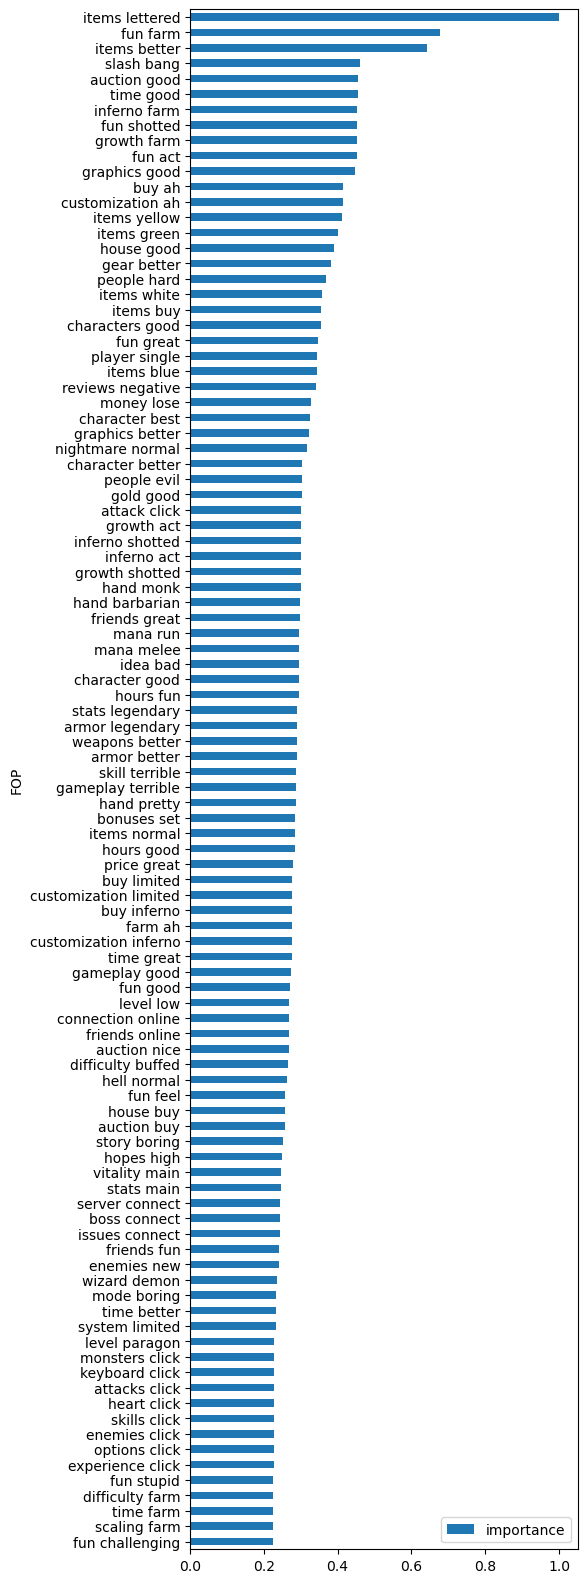

In [18]:
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [5, 20]

FOPs_df = FOPs_df.sort_values('importance', ascending=False)
FOPs_df_top100 = FOPs_df.head(100)

ax = FOPs_df_top100.plot.barh(x='FOP', y = 'importance')
ax.invert_yaxis()
plt.show()

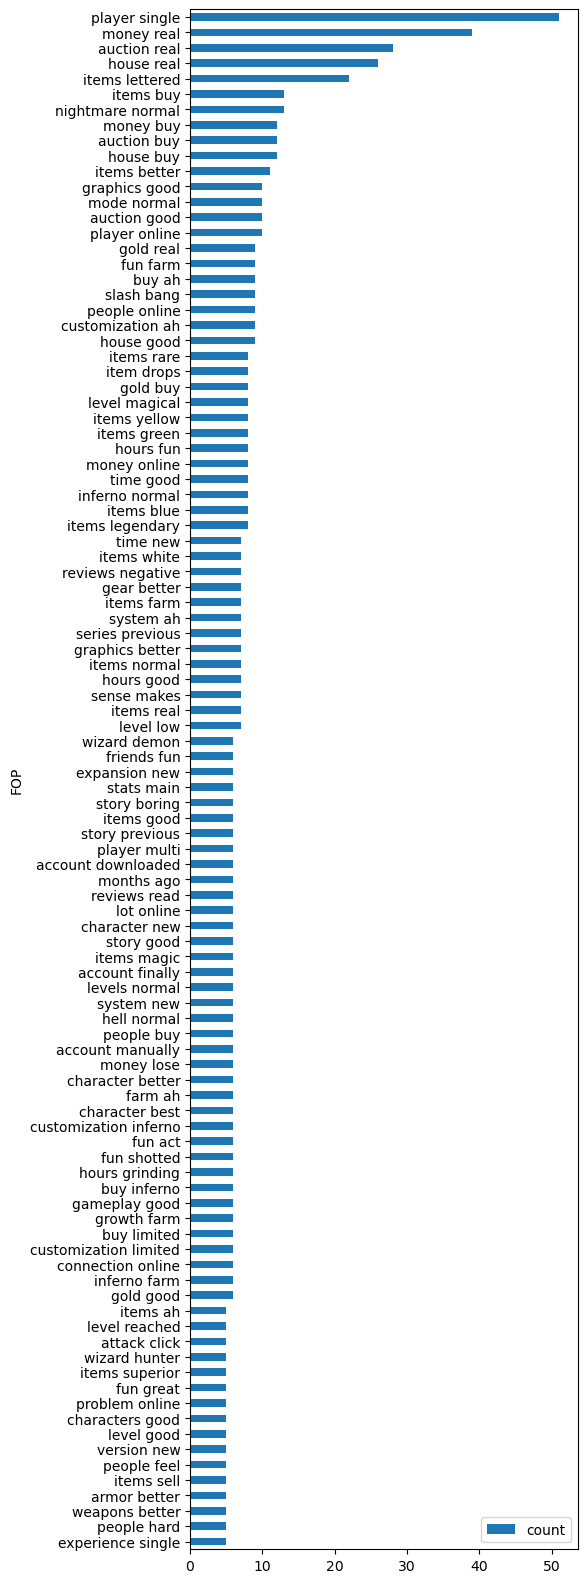

In [19]:
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [5, 20]

FOPs_df = FOPs_df.sort_values('count', ascending=False)
FOPs_df_top100 = FOPs_df.head(100)

ax = FOPs_df_top100.plot.barh(x='FOP', y = 'count')
ax.invert_yaxis()
plt.show()

In [15]:
aggregation_functions = {'count':'sum', 'importance':'sum', 'feature':'first'}
FOPs_df_new = FOPs_df.groupby(FOPs_df['feature']).aggregate(aggregation_functions)

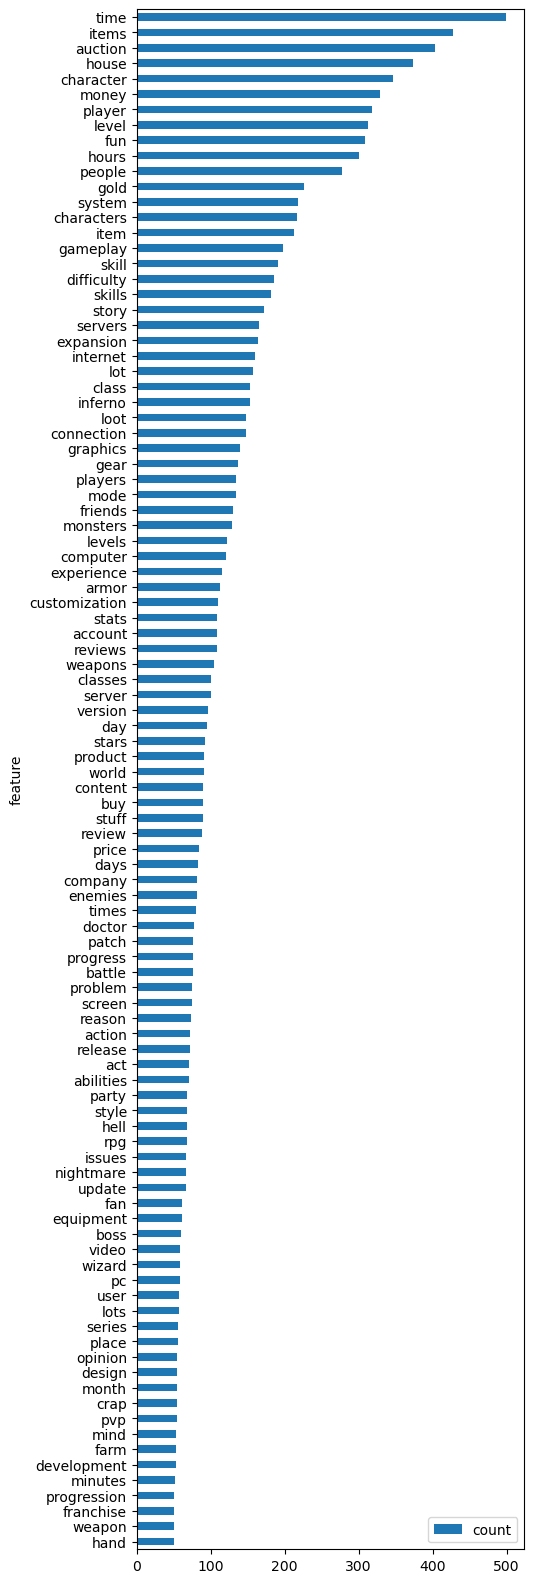

In [16]:
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [5, 20]

FOPs_df_new = FOPs_df_new.sort_values('count', ascending=False)
FOPs_df_new_top100 = FOPs_df_new.head(100)

ax = FOPs_df_new_top100.plot.barh(x='feature', y = 'count')
ax.invert_yaxis()
plt.show()

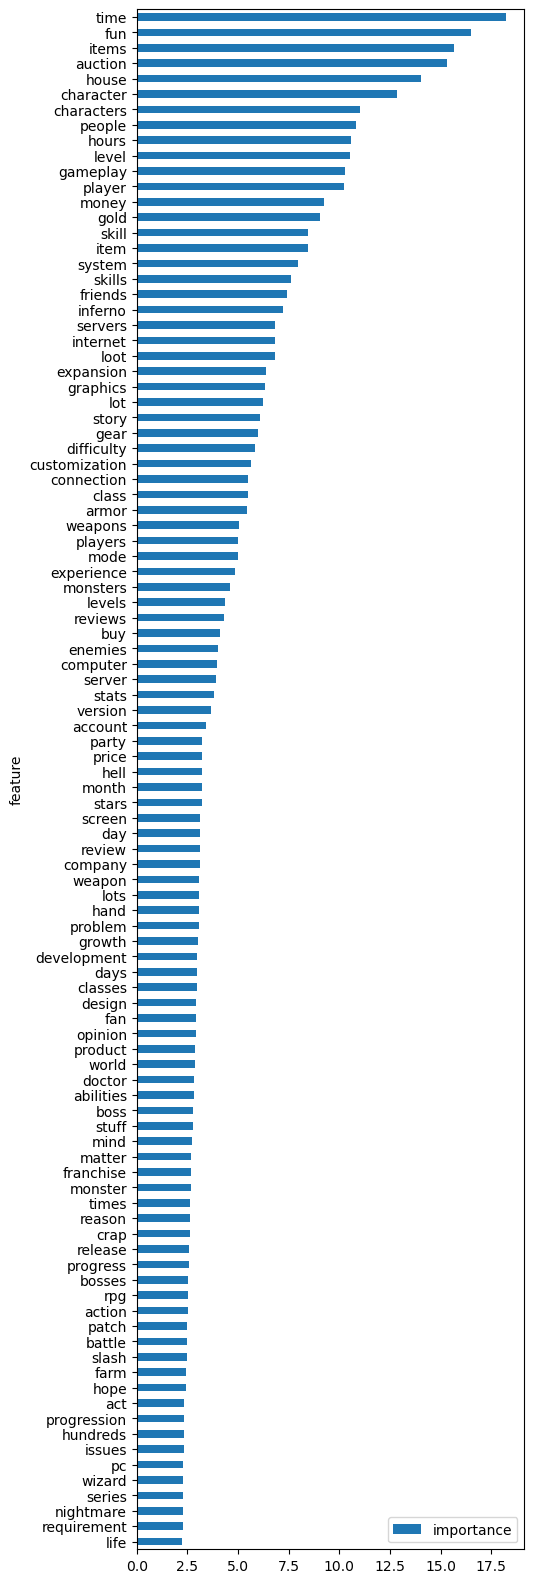

In [17]:
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [5, 20]

FOPs_df_new = FOPs_df_new.sort_values('importance', ascending=False)
FOPs_df_new_top100 = FOPs_df_new.head(100)

ax = FOPs_df_new_top100.plot.barh(x='feature', y = 'importance')
ax.invert_yaxis()
plt.show()